# Revelio Labs

# Data Science Assignment

Shambhavi Sachin Rege, NYU

# Loading Libraries

In [240]:
import pandas as pd
import numpy as np
from functools import reduce
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from googletrans import Translator, constants
import httpx

# Loading Data

In [241]:
positions = pd.read_csv('positions.csv')
education = pd.read_csv('education.csv')
job_seniority = pd.read_csv('jobtitle_seniority.csv')

In [242]:
education.describe()

,user_id,major,startdate,enddate
count,226184,162346,197556,190658
unique,100000,44871,572,632
top,JBrqCQYzF+vs0NvzCbRnIQ5+2cvffV/mNepQVJd0smgtpB...,Bachelor's degree,2010-01-01,2012-01-01
freq,44,5940,9672,10274


In [243]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226184 entries, 0 to 226183
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    226184 non-null  object
 1   major      162346 non-null  object
 2   startdate  197556 non-null  object
 3   enddate    190658 non-null  object
dtypes: object(4)
memory usage: 6.9+ MB


In [244]:
education['major']

0                                     Master of Viticulture
1                                  Bachelor of horticulture
2                                              WSET Level 3
3                                         Graduated Diploma
4         Lingüística Aplicada en la Enseñanza del Inglé...
                                ...                        
226179                                Bachelor&#39;s degree
226180                                      Master's degree
226181                                                  NaN
226182                                          High School
226183                                                  NaN
Name: major, Length: 226184, dtype: object

In [245]:
job_seniority

,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998
...,...,...,...
416290,ZSOjvStDYr039llu+FQe2A5+2cvffV/mNepQVJd0smgtpB...,prestadora_de_seviços_de_design_|_information_...,3.750685
416291,Ca0Cmg3KOHmQ4C+XuY1F2Q5+2cvffV/mNepQVJd0smgtpB...,research_fellow_|_research,3.582192
416292,6gc1HbmDe02uJYCw0BefLw4ZM3TcQvn1bQ/jHgHWG0kf/b...,post_doctorate_research_fellow_|_research,3.792466
416293,CbRNq3nds7RvMQBatG2Qe3AG1BvSkUYANepQVJd0smgtpB...,junior_project_manager_european_funds_|_inform...,6.920548


In [246]:
positions

,user_id,jobtitle,startdate,enddate
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01
1,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01
2,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,project_technician,2012-06-01,2012-09-01
3,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,telesales,2014-08-01,2015-03-01
4,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01
...,...,...,...,...
377580,vxU1qJyHb2gVbsEWViOpxzr+/k0/DTn/+K+fv+DIJSUQ20...,senior_technical_lead_|_information_technology...,2016-01-01,2017-08-01
377581,z4kOplYyJGBhbalIOi394nAG1BvSkUYANepQVJd0smgtpB...,sr_software_test_engineer_|_information_techno...,2006-10-01,2010-06-01
377582,+TxsWIH6AJDd9axCsVyrVnAG1BvSkUYANepQVJd0smgtpB...,technical_lead,2010-11-01,2017-07-01
377583,FDyRxqAHag1OKApMgaEwKA5+2cvffV/mNepQVJd0smgtpB...,senior_software_engineer_|_information_technol...,2017-01-01,NaN


# Preprocessing Data Frames and Creating Training Data

In [247]:
data_frames = [positions, job_seniority]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'jobtitle'], how='outer'), data_frames)

# Adding a total number of jobs column
df_merged = df_merged.merge(df_merged.groupby('user_id').count()['jobtitle'], on =['user_id']).rename(columns = {'jobtitle_y' : 'number of jobs', 'jobtitle_x':'jobtitle'})
df_merged

,user_id,jobtitle,startdate,enddate,seniority,number of jobs
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01,4.047756,3
1,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,stocker,2002-01-01,2005-03-01,1.228262,3
2,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,bus_driver,2012-08-01,2018-05-01,4.295299,3
3,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01,5.728730,16
4,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,psykolog,2003-06-01,2004-03-01,3.176877,16
...,...,...,...,...,...,...
449015,dKvHGCAG9mrUn4swEMxXE3b8pH4QURE7NepQVJd0smgtpB...,NaN,NaN,NaN,4.307247,0
449016,vJ89BPtSy0qDvC6gTs/N8g5+2cvffV/mNepQVJd0smgtpB...,student,NaN,NaN,0.992466,1
449017,Hu615a4tbrLcXWJPjk24Qg5+2cvffV/mNepQVJd0smgtpB...,repartidor_con_vehículo_propio,NaN,NaN,4.307247,1
449018,jVDCX0/BDU9ffUU0flyiYQ5+2cvffV/mNepQVJd0smgtpB...,diesel_fitter_|_automotive,NaN,NaN,7.341096,1


In [248]:
#Adding a column to assign an index to the ith job
df_merged['idx'] = df_merged.sort_values(by = ['startdate']).groupby('user_id').cumcount()
tmp = []
for var in ['jobtitle']:
    df_merged['tmp_idx'] = var + '_' + df_merged.idx.astype(str)
    tmp.append(df_merged.pivot(index='user_id',columns='tmp_idx',values=var))

#Keeping the first job for every user
df_merged = df_merged[df_merged['tmp_idx'].isin(['jobtitle_0'])]
df_merged

,user_id,jobtitle,startdate,enddate,seniority,number of jobs,idx,tmp_idx
1,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,stocker,2002-01-01,2005-03-01,1.228262,3,0,jobtitle_0
16,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,afløser,1987-01-01,1992-01-01,3.478634,16,0,jobtitle_0
27,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,instrument_technician,1999-02-01,2006-06-01,3.592605,11,0,jobtitle_0
31,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,callcenter_agent_|_information_technology_serv...,2011-11-01,2012-08-01,2.182192,7,0,jobtitle_0
37,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01,4.150419,5,0,jobtitle_0
...,...,...,...,...,...,...,...,...
449015,dKvHGCAG9mrUn4swEMxXE3b8pH4QURE7NepQVJd0smgtpB...,NaN,NaN,NaN,4.307247,0,0,jobtitle_0
449016,vJ89BPtSy0qDvC6gTs/N8g5+2cvffV/mNepQVJd0smgtpB...,student,NaN,NaN,0.992466,1,0,jobtitle_0
449017,Hu615a4tbrLcXWJPjk24Qg5+2cvffV/mNepQVJd0smgtpB...,repartidor_con_vehículo_propio,NaN,NaN,4.307247,1,0,jobtitle_0
449018,jVDCX0/BDU9ffUU0flyiYQ5+2cvffV/mNepQVJd0smgtpB...,diesel_fitter_|_automotive,NaN,NaN,7.341096,1,0,jobtitle_0


In [249]:
#Adding a column to assign an index to the ith major
education['idx'] = education.sort_values(by = ['startdate']).groupby('user_id').cumcount()
tmp = []
for var in ['major']:
    education['tmp_idx'] = var + '_' + education.idx.astype(str)
    tmp.append(education.pivot(index='user_id',columns='tmp_idx',values=var))
    
#Keeping the first major for every user
education = education[education['tmp_idx'].isin(['major_0'])]
education

,user_id,major,startdate,enddate,idx,tmp_idx
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01,0,major_0
5,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Licenciado en Lenguas Extranjeras,2005-01-01,2012-01-01,0,major_0
7,3VRjfXobf5CYummRNRjRlw5+2cvffV/mNepQVJd0smgtpB...,Master of Business Administration (M.B.A.),2010-01-01,2015-01-01,0,major_0
10,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,BA,2008-01-01,2012-01-01,0,major_0
11,8kzrV1HxHSzCdKPGzOmlaQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,Bsc,1985-01-01,1988-01-01,0,major_0
...,...,...,...,...,...,...
226170,tri9FhQCSPw7/CXecOEtDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,2004-01-01,2007-01-01,0,major_0
226172,EJoWzckvqhqrXxxSJla7UQ5+2cvffV/mNepQVJd0smgtpB...,Ing. Sistemas Computacionales,NaN,NaN,0,major_0
226178,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,Economista con Énfasis en Admnistración de Emp...,1991-01-01,1997-01-01,0,major_0
226179,aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/b...,Bachelor&#39;s degree,1985-01-01,1990-01-01,0,major_0


In [250]:
def translate_major(df):

    timeout = httpx.Timeout(60) # 5 seconds timeout
    translator = Translator(timeout=timeout)
    
    #Splitting data on basis of major into other majors and known majors
    split_1 = df[~df["major"].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc|Master|master|MS|Msc|graduate|Graduate|school|School|diploma|Diploma', na=False)]
    split_2 = df[df["major"].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc|Master|master|MS|Msc|graduate|Graduate|school|School|diploma|Diploma', na=False)]
    
    #Translating every major
    translated = []
    for i in range(len(split_1)):
        translated.append(translator.translate(split_1['major'].iloc[i]).text) 
        
    #Creating a column for translated major, dropping the non-translated major column and renaming accordingly   
    split_1['major_translated'] = translated    
    split_1 = split_1.drop(columns = ['major'])
    split_1 = split_1.rename(columns = {'major_translated': 'major'})
    
    #Concatinating the two splits
    df = pd.concat([split_1, split_2])
    
    return df
    

In [251]:
#Code takes longer to run hence commented out
#education = translate_major(education)

In [252]:
#Spliting education data frame into the following categories

#Creating a data frame of rows of users with Bachelors or similar major as first major
df_b = education[education['major'].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc', na=False)]

#Creating a data frame of rows of users with High School or similar major as first major
df_s = education[education['major'].str.contains('school|School|diploma|Diploma', na=False)]

#Creating a data frame of rows of users with Post Grad or similar major as first major
df_p = education[education['major'].str.contains('Master| master|MS|Msc|graduate|Graduate', na=False)]

#Creating a data frame of rows of users with Other majors as first major
df_o = education[~education["major"].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc|Master|master|MS|Msc|graduate|Graduate|school|School|diploma|Diploma', na=False)]

In [253]:
#Defining a function to create columns for the data frames for all the above categories
def dataframe_columns(df, category):
    #Merging the dataframe of (job seniority, positions) with the education(each category) data frame
    df = pd.merge(df, df_merged, on = ['user_id'], how = 'inner')
    
    #Dropping the unncessary columns
    df = df.drop(columns=['idx_x', 'tmp_idx_x','idx_y','tmp_idx_y'])
    
    #Extracting years from the start date from the first major and making a column for years from start of first major to today
    df['year'] = pd. DatetimeIndex(df['startdate_x']).year
    df['years from start of first major'] = 2022 - df['year']
    
    #Renaming columns
    df = df.rename(columns = {'startdate_x' : 'startdate_major','enddate_x' : 'enddate_major', 'startdate_y' : 'startdate_job', 'enddate_y' : 'enddate_job', 'year':'start year of first major' })
    
    #Extracting years from the end date of first major and creating a column for the years taken to finish first major
    df['end year of major'] =  pd.DatetimeIndex(df['enddate_major']).year
    df['number of years of first major'] = df['end year of major']- df['start year of first major']
    
    #Extracting years from the start date from the first job and making a column for number of years in the workforce upto today
    df['start year of first job'] =  pd.DatetimeIndex(df['startdate_job']).year
    df['years in work force'] = 2022 - df['start year of first job']
    
    
    #One-Hot encoding for each category
    if category == 'b':
        #Establishing a relationship between the target variable 'age' and years from start of first major, this case bachelors (assumption: a person starts an under graduate degree at 18) 
        df['age'] = df['years from start of first major'] + 18
        
        df['Bachelor'] = 1
        df['Post Grad'] = 0
        df['High School'] = 0
        df['Other'] = 0
        
    elif category == 's':
        #Establishing a relationship between the target variable 'age' and years from start of first major, this case bachelors (assumption: a person starts high school at 16) 
        df['age'] = df['years from start of first major'] + 16
        
        df['Bachelor'] = 0
        df['Post Grad'] = 0
        df['High School'] = 1
        df['Other'] = 0    
        
    elif category == 'p':
        #Establishing a relationship between the target variable 'age' and years in workforce because information about major is unreliable, (assumption: a person joins workforce at 22) 
        df['age'] = df['years in work force'] + 22
        
        df['Bachelor'] = 0
        df['Post Grad'] = 1
        df['High School'] = 0
        df['Other'] = 0
        
    elif category == 'o':
        #Establishing a relationship between the target variable 'age' and years in workforce because information about major is unreliable, (assumption: a person joins workforce at 22)         
        df['age'] = df['years in work force'] + 22
        
        df['Bachelor'] = 0
        df['Post Grad'] = 0
        df['High School'] = 0
        df['Other'] = 1    
    
    #This is the case for final data preparation
    else:
        return df

    
    
    return df

In [254]:
#Calling the above function on each category
df_train_b = dataframe_columns(df_b, 'b')
df_train_s = dataframe_columns(df_s, 's')
df_train_p = dataframe_columns(df_p, 'p')
df_train_o = dataframe_columns(df_o, 'o')

#Merging all the datframes on axis = 1
df_train_union = pd.concat([df_train_b.sample(frac=0.50), df_train_s.sample(frac=0.50), df_train_p.sample(frac=0.50), df_train_o.sample(frac=0.50)])
df_train = df_train_union

#Checking for duplicates and dropping them 
df_train = df_train.drop_duplicates(subset=['user_id'], keep='first')

# EDA on Training Data

In [255]:
df_train.describe()

,seniority,number of jobs,start year of first major,years from start of first major,end year of major,number of years of first major,start year of first job,years in work force,age,Bachelor,Post Grad,High School,Other
count,49785.000000,50423.000000,45892.000000,45892.000000,44776.000000,44457.000000,40004.000000,40004.000000,42168.000000,50423.000000,50423.000000,50423.000000,50423.000000
mean,3.955545,4.450449,1997.931470,24.068530,2001.692447,3.886610,2003.331417,18.668583,41.051864,0.361660,0.038137,0.057791,0.542411
std,1.868908,3.180981,12.175127,12.175127,11.700088,3.053742,9.682059,9.682059,10.971183,0.480486,0.191530,0.233350,0.498203
min,0.084932,0.000000,1735.000000,1.000000,1900.000000,-28.000000,1900.000000,4.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,2.856107,2.000000,1991.000000,15.000000,1995.000000,3.000000,1999.000000,12.000000,33.000000,0.000000,0.000000,0.000000,0.000000
50%,3.824978,4.000000,2001.000000,21.000000,2005.000000,4.000000,2006.000000,16.000000,38.000000,0.000000,0.000000,0.000000,1.000000
75%,4.818102,6.000000,2007.000000,31.000000,2010.000000,5.000000,2010.000000,23.000000,46.000000,1.000000,0.000000,0.000000,1.000000
max,29.186301,86.000000,2021.000000,287.000000,2025.000000,209.000000,2018.000000,122.000000,260.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
#Dropping columns that do not go into training
df_train = df_train.drop(columns=['major', 'startdate_major','enddate_major','jobtitle','startdate_job','enddate_job'])
df_train.columns

Index(['user_id', 'seniority', 'number of jobs', 'start year of first major',
       'years from start of first major', 'end year of major',
       'number of years of first major', 'start year of first job',
       'years in work force', 'age', 'Bachelor', 'Post Grad', 'High School',
       'Other'],
      dtype='object')

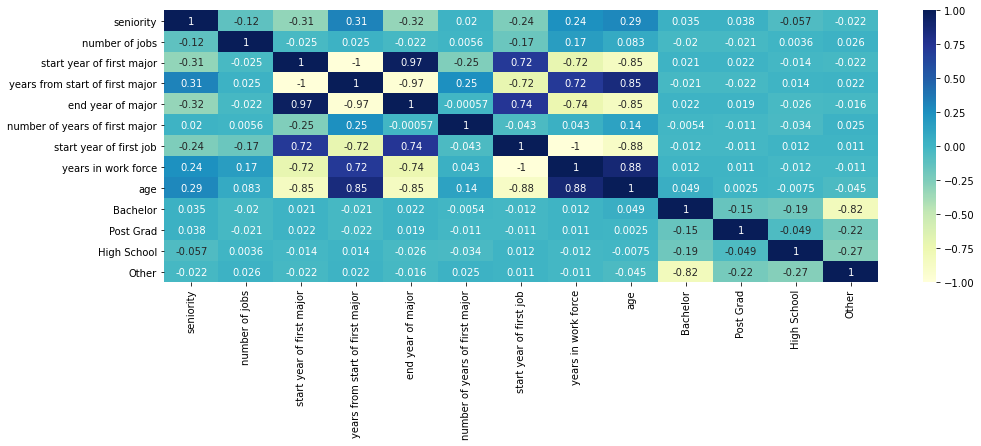

In [257]:
# displaying heatmap
plt.figure(figsize = (16,5))
ax = sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

/Users/shambhavirege/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shambhavirege/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shambhavirege/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

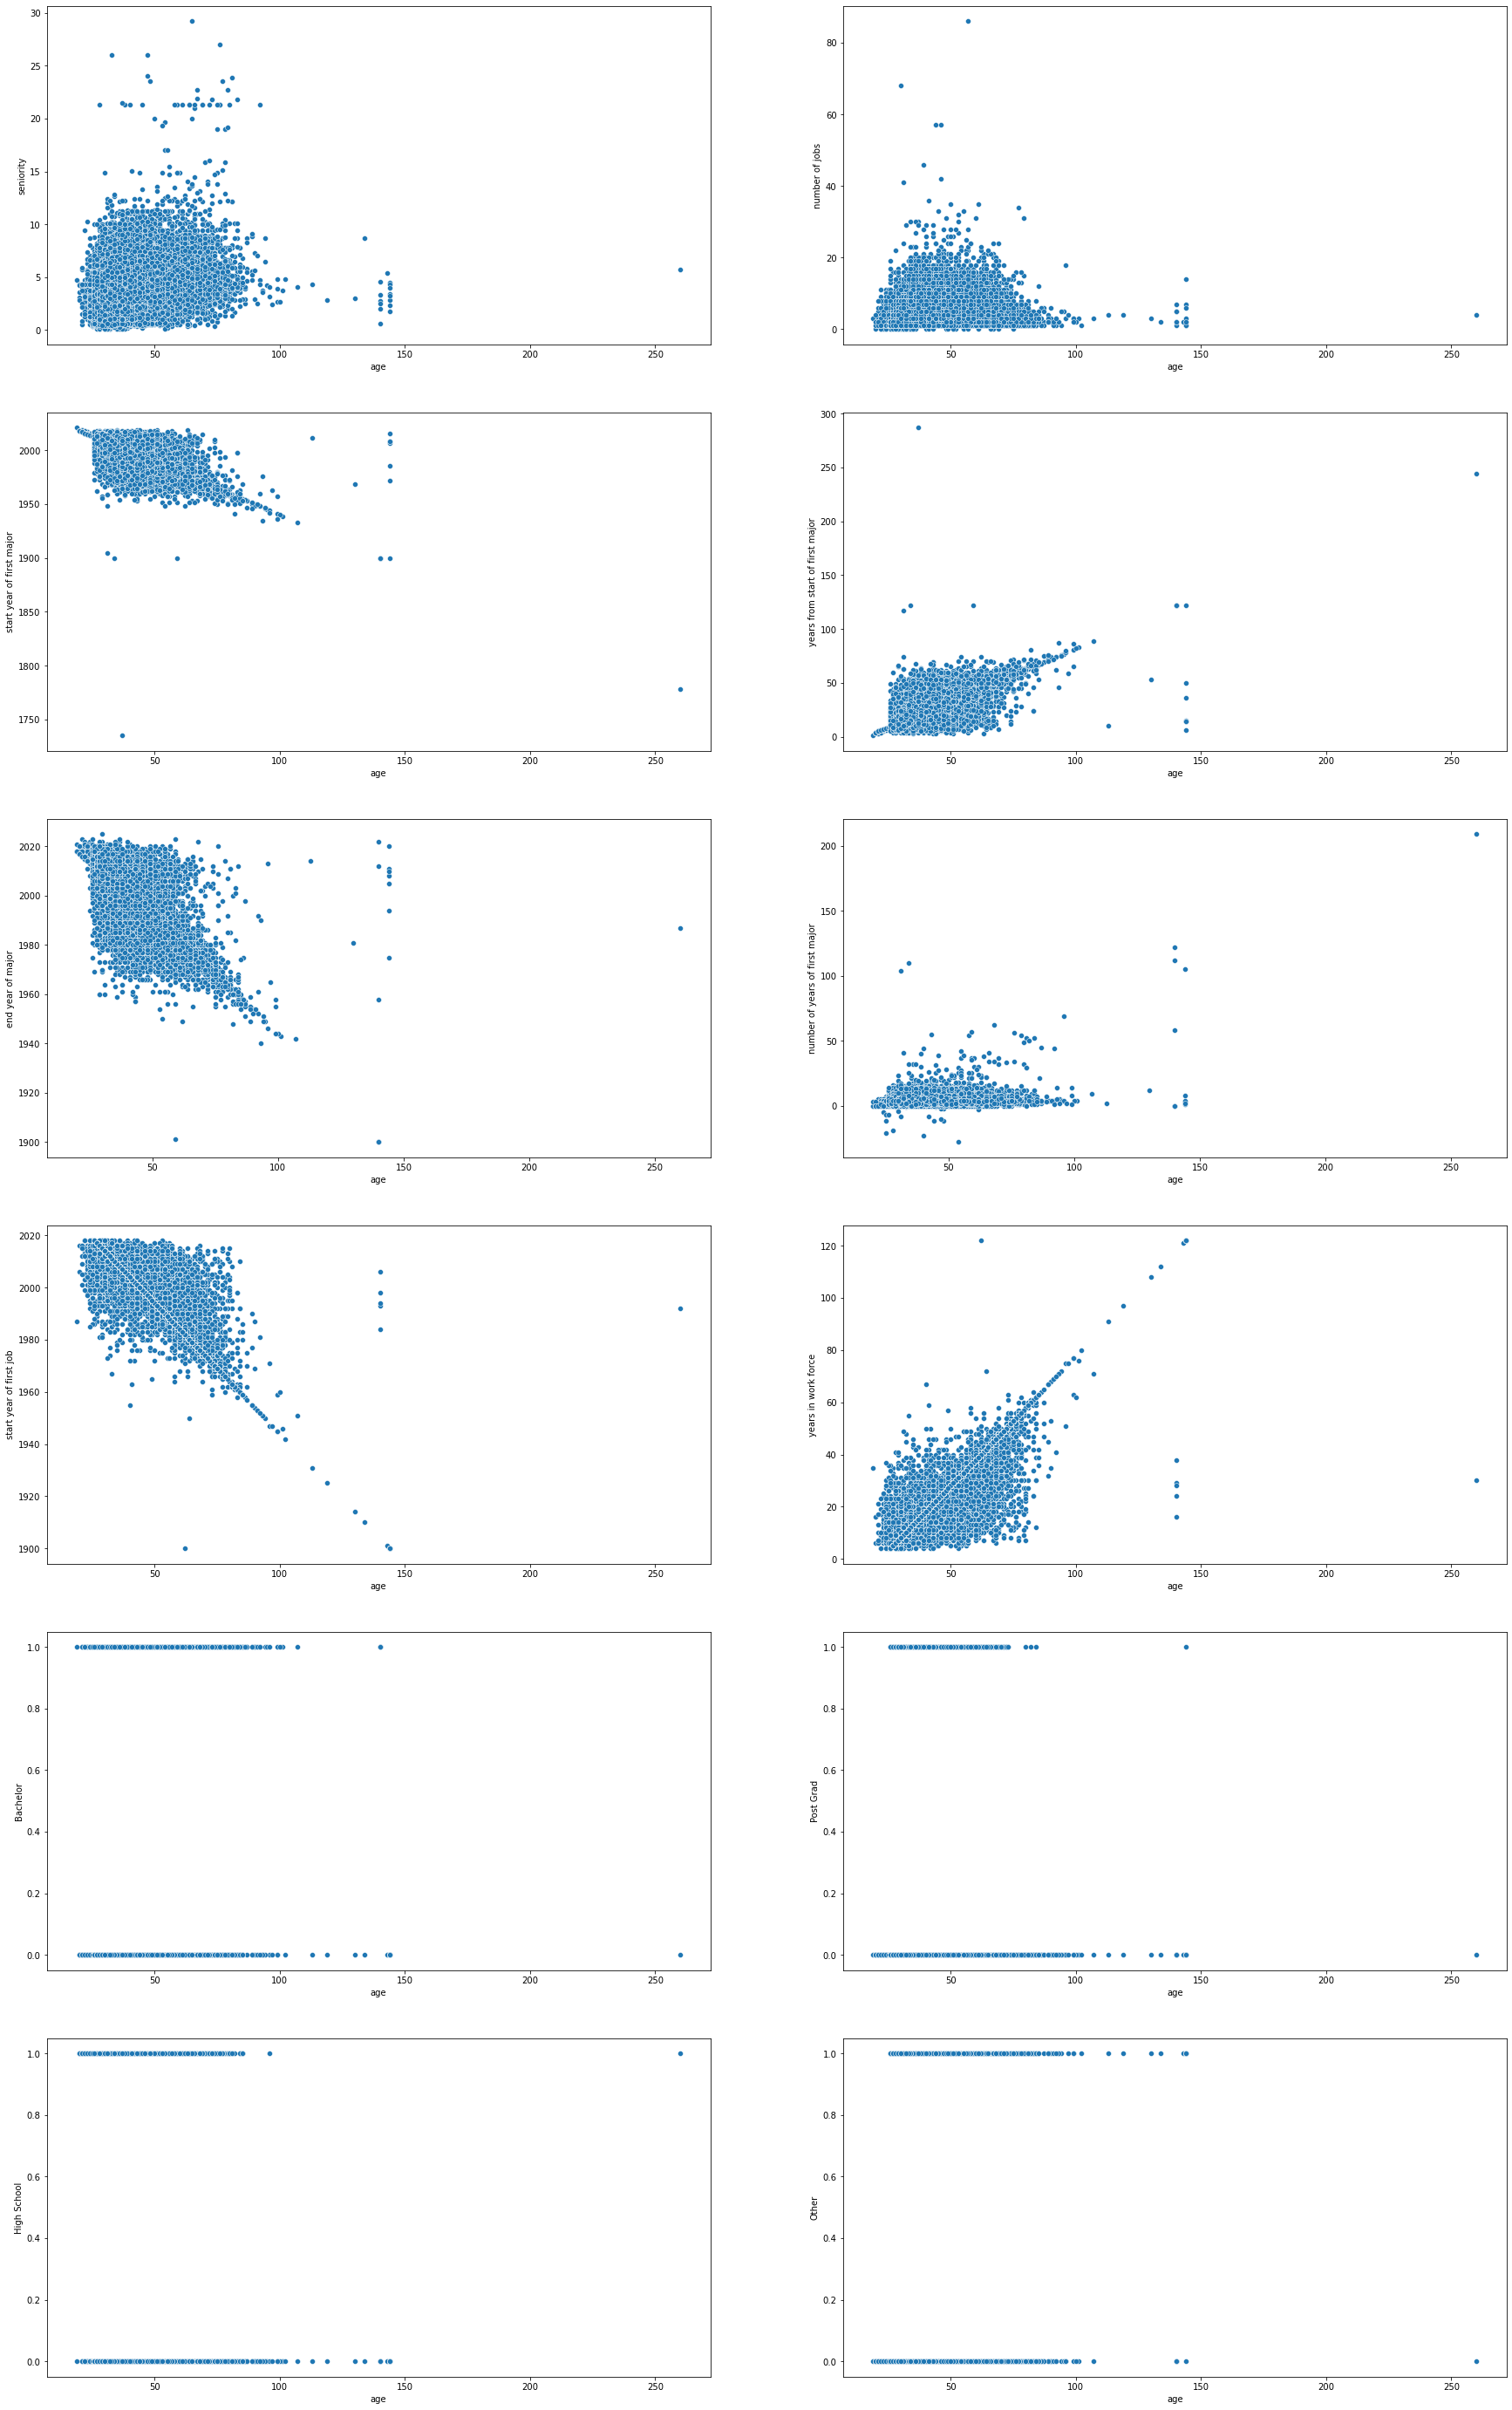

In [258]:
#Scatter plots displaying the relation between features
fig,ax=plt.subplots(6,2,figsize = (30,50))
i=0
row = 0
col = 0
target = 'age'
for col in df_train.columns:
    if(col!=target and col!= 'user_id'):
        
        r = int(i/2)
        c = i % 2
        sns.scatterplot(df_train[target],df_train[col],ax=ax[r][c])
        i=i+1            
plt.show()

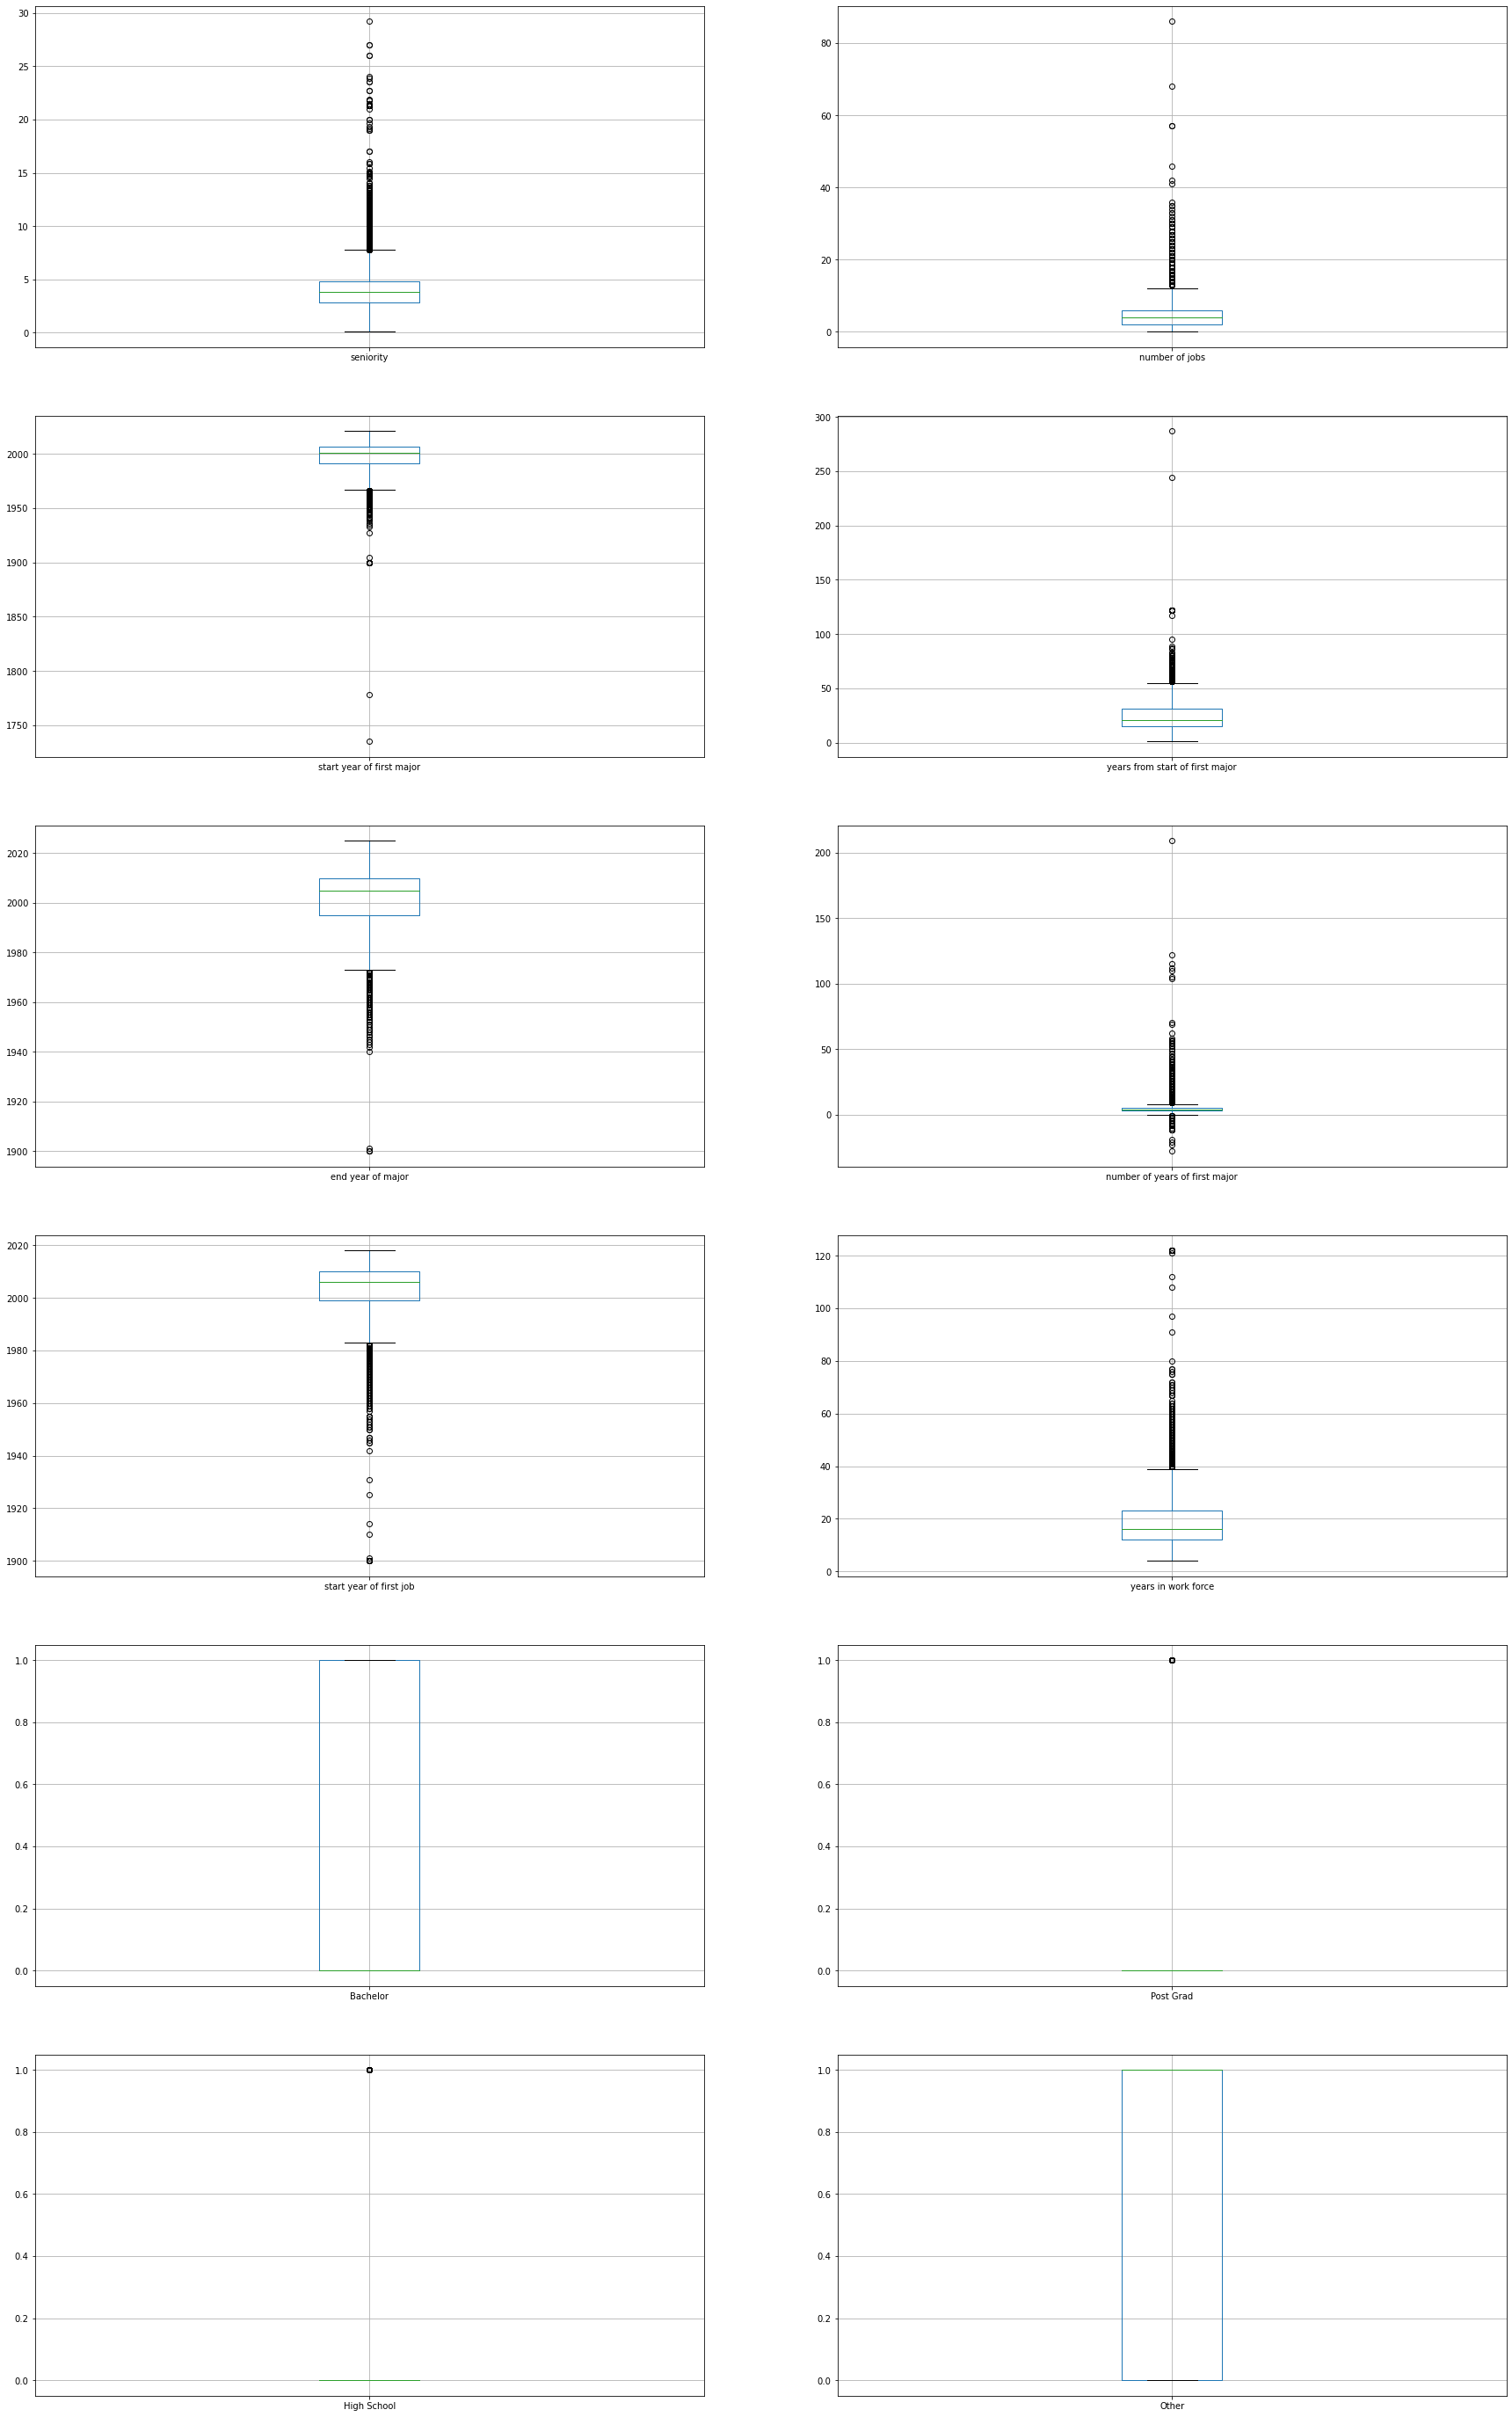

In [259]:
fig,ax=plt.subplots(6,2,figsize = (30,50))
i=0
row = 0
col = 0
for col in df_train.columns:
    if(col!=target and col!= 'user_id'):
        
        r = int(i/2)
        c = i % 2
        df_train.boxplot(column=col, ax=ax[r][c])
        i=i+1
            
plt.show()

# Treating Outliers

In [260]:
cols = ['seniority', 'number of jobs', 'start year of first major',
       'years from start of first major', 'end year of major',
       'number of years of first major', 'start year of first job',
       'years in work force', 'age']
Q1 = df_train[cols].quantile(0.25)
Q3 = df_train[cols].quantile(0.75)
IQR = Q3 - Q1

df = df_train[~((df_train[cols] < (Q1 - 1.5 * IQR)) |(df_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train = df

In [261]:
#Make a copy to use for submission
df_train_copy = df_train

# Getting Data Ready for Training

In [262]:
#Function to separate features and target variable
def get_data(df_train):    
    df_train = df_train[df_train['age'].notna()]

    target = 'age'
    feats = [col for col in df_train.columns if col!=target]

    X = df_train[feats]
    y=df_train[target]
    
    return X,y



# Modelling

# 1. Random Forest

In [263]:
df_train = df_train.drop(columns = ['user_id'])
target = 'age'
feats = [col for col in df_train.columns if col!=target]

#Dropping 
X,y = get_data(df_train.dropna())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Split train into train and CV
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [264]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred =  clf.predict(X_test)

<AxesSubplot:>

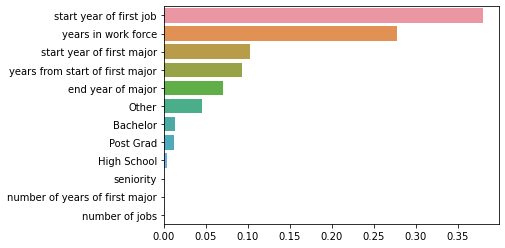

In [265]:
feat_imp = clf.feature_importances_
feat_imp=pd.Series(feat_imp)

#plotting feat importances
feat_imp.index=feats
feat_imp = feat_imp.sort_values(ascending=False)
sns.barplot(y=feat_imp.index,x=feat_imp)

In [266]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 0.016074254862806003
Mean Squared Error: 0.008972176614155758
Root Mean Squared Error: 0.0947215741748191


In [267]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04186921529175053
Mean Squared Error: 0.04831603621730383
Root Mean Squared Error: 0.2198090903882363


# 2. XGBoost

In [268]:
X,y = get_data(df_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Split train into train and CV
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [269]:
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.142 (0.011)


In [270]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred =  model.predict(X_test)

In [271]:
y_pred

array([32.0167  , 60.937992, 40.008133, ..., 51.69367 , 36.996784,
       21.890114], dtype=float32)

In [272]:
X_test

,seniority,number of jobs,start year of first major,years from start of first major,end year of major,number of years of first major,start year of first job,years in work force,Bachelor,Post Grad,High School,Other
22150,1.041096,2,2009.0,13.0,2013.0,4.0,2012.0,10.0,0,0,0,1
30839,7.435016,2,NaN,NaN,NaN,NaN,1983.0,39.0,0,0,0,1
15601,3.583562,4,2000.0,22.0,2004.0,4.0,2004.0,18.0,1,0,0,0
12630,5.630137,2,1997.0,25.0,2002.0,5.0,NaN,NaN,1,0,0,0
53201,0.615559,4,2005.0,17.0,2008.0,3.0,2013.0,9.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41380,3.745884,4,2010.0,12.0,2012.0,2.0,2009.0,13.0,0,0,0,1
50048,2.249806,2,2010.0,12.0,2012.0,2.0,2013.0,9.0,0,0,0,1
3534,3.859766,7,1986.0,36.0,1990.0,4.0,1996.0,26.0,0,0,1,0
6787,3.091370,7,2003.0,19.0,2009.0,6.0,2004.0,18.0,1,0,0,0


In [273]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15530096894678821
Mean Squared Error: 0.08916744382703722
Root Mean Squared Error: 0.29860918242250556


In [274]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 0.10865225155643747
Mean Squared Error: 0.026621511920215696
Root Mean Squared Error: 0.16316099999759653


# Possible Feature Elimination

In [275]:
#Dropping 'number of jobs' and 'number of years of first major' because they are not as important as others
df_train_new = df_train.drop(columns = ['number of jobs','number of years of first major'])

In [276]:
X,y = get_data(df_train_new)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Split train into train and CV
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.137 (0.010)


In [277]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred =  model.predict(X_test)

In [278]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13367506880492555
Mean Squared Error: 0.07345568779231167
Root Mean Squared Error: 0.2710270978930182


In [279]:
#Evaluation Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 0.0942893519009765
Mean Squared Error: 0.021186925649682904
Root Mean Squared Error: 0.14555729335791767


# Preparing the Final Prediction Data

In [280]:
X_final = dataframe_columns(education, '')

#One-Hot Encoding of Final Data
X_final['Bachelor'] = 0
X_final.loc[X_final['major'].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc', na=False), 'Bachelor'] = 1
X_final['Post Grad'] = 0
X_final.loc[X_final['major'].str.contains('Master|master|MS|Msc|graduate|Graduate', na=False), 'Post Grad'] = 1
X_final['High School'] = 0
X_final.loc[X_final['major'].str.contains('school|School|diploma|Diploma', na=False), 'High School'] = 1
X_final['Other'] = 0
X_final.loc[~X_final['major'].str.contains('Bachelor| bachelor|Bsc|bsc|BA|BE|BTECH|be|btech|degree|Degree|under|Under|BS|B.S.|B.A.|BSc|Master|master|MS|Msc|graduate|Graduate|school|School|diploma|Diploma', na=False), 'Other'] = 1

x_user_id = X_final['user_id']

X_final = X_final.drop(columns=['user_id','major', 'startdate_major','enddate_major','jobtitle','startdate_job','enddate_job', 'number of jobs', 'number of years of first major'])

In [281]:
y_pred_final = model.predict(X_final)

In [282]:
y_pred_final

array([38.863064, 33.964325, 31.051252, ..., 48.912495, 54.97121 ,
       40.91945 ], dtype=float32)

In [283]:
X_final

,seniority,start year of first major,years from start of first major,end year of major,start year of first job,years in work force,Bachelor,Post Grad,High School,Other
0,4.761488,2001.0,21.0,2005.0,2008.0,14.0,1,0,0,0
1,3.041096,2005.0,17.0,2012.0,2010.0,12.0,0,0,0,1
2,3.907332,2010.0,12.0,2015.0,2012.0,10.0,1,1,0,0
3,2.753425,2008.0,14.0,2012.0,2012.0,10.0,1,0,0,0
4,9.967123,1985.0,37.0,1988.0,1992.0,30.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,0.995890,2004.0,18.0,2007.0,2010.0,12.0,0,0,0,1
99996,3.031764,NaN,NaN,NaN,2005.0,17.0,0,0,0,1
99997,5.974429,1991.0,31.0,1997.0,1995.0,27.0,0,0,0,1
99998,4.961644,1985.0,37.0,1990.0,NaN,NaN,1,0,0,0


In [284]:
X_final['user_id'] = x_user_id
X_final['age'] = y_pred_final

In [285]:
df_train_copy['training'] = 1

In [286]:
final = pd.merge(X_final, df_train_copy, on = 'user_id', how = 'left')

In [289]:
final['age_x'] = final['age_x'].astype(int)

In [290]:
submission = final[['user_id','age_x','training']].rename(columns = {'age_x' : 'age' , 'training':'true_or_predicted'})

In [291]:
submission= submission.fillna({'true_or_predicted':0})

In [292]:
submission

,user_id,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,38,1.0
1,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,33,1.0
2,3VRjfXobf5CYummRNRjRlw5+2cvffV/mNepQVJd0smgtpB...,31,0.0
3,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,31,0.0
4,8kzrV1HxHSzCdKPGzOmlaQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,55,0.0
...,...,...,...
99995,tri9FhQCSPw7/CXecOEtDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,33,1.0
99996,EJoWzckvqhqrXxxSJla7UQ5+2cvffV/mNepQVJd0smgtpB...,39,1.0
99997,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,48,1.0
99998,aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/b...,54,0.0


In [293]:
submission.to_csv('submission_final.csv')